# Sprint19 U-net

# 【問題1】学習・推定
以下のKeras実装を使用して学習・推定を行ってください。


zhixuhao/unet: unet for image segmentation


《GPU環境での学習》大規模なデータセット、大きなモデルになるため、GPUを使用する必要があります。


《新たなデータセットの適用》公開されている実装で用意されたものとは異なるデータセットを入力するための準備が必要です。


---


**■使用するデータセット**： [KaggleのTGS Salt Identification Challenge](https://www.kaggle.com/c/tgs-salt-identification-challenge)

KaggleのTGS Salt Identification Challengeのデータセットを使用し、セグメンテーションを行います。

TGS Salt Identification Challengeとは・・・

石油採掘と関連が深い地中に塩が溜まっている場所を見分ける機械学習アルゴリズムを作るもの

---
[U-net使い方](https://farml1.com/segmentation_3/)


In [ ]:
#cd drive/My Drive/data/unet
#!pip install keras==2.2.4
#!pip install tensorflow==1.14.0
#input、outputは未修正にて保存

In [55]:
#Data Augmentation（データの水増し）

from data import *
data_gen_args = dict(rotation_range=0.2,#回転
                    width_shift_range=0.05,#水平移動
                    height_shift_range=0.05,#垂直移動
                    shear_range=0.05,#シアー変換
                    zoom_range=0.05,#ズーム
                    horizontal_flip=True,#左右反転
                    fill_mode='nearest')
myGenerator = trainGenerator(20,'data/membrane/train','image','label',
                             data_gen_args,save_to_dir = "data/membrane/train/aug")
num_batch = 3
for i,batch in enumerate(myGenerator):
    if(i >= num_batch):
        break
image_arr,mask_arr = geneTrainNpy("data/membrane/train/aug/","data/membrane/train/aug/")

Using TensorFlow backend.
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

Found 30 images belonging to 1 classes.
Found 30 images belonging to 1 classes.


In [3]:
from model import *
from data import *
model = unet()
model_checkpoint = ModelCheckpoint('unet_membrane.hdf5', monitor='loss',verbose=1, save_best_only=True)
imgs_train,imgs_mask_train = geneTrainNpy("data/membrane/train/aug/","data/membrane/train/aug/")
history = model.fit(imgs_train, imgs_mask_train, batch_size=10, epochs=30, verbose=1,validation_split=0.2, 
                    shuffle=True, callbacks=[model_checkpoint])

Using TensorFlow backend.
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

/usr/local/lib/python3.7/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:544: FutureWa


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/content/drive/My Drive/data/unet/model.py:55: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`
  model = Model(input = inputs, output = conv10)


Train on 48 samples, validate on 12 samples
Epoch 1/30
48/48 [==============================] - 151s 3s/step - loss: 0.6852 - acc: 0.6894 - val_loss: 0.5802 - val_acc: 0.7809

Epoch 00001: loss improved from inf to 0.68525, saving model to unet_membrane.hdf5
Epoch 2/30
48/48 [==============================] - 149s 3s/step - loss: 0.4956 - acc: 0.8074 - val_loss: 0.5553 - val_acc: 0.7809

Epoch 00002: loss improved from 0.68525 to 0.49556, saving model to unet_membrane.hdf5
Epoch 3/30
48/48 [==============================] - 148s 3s/step - loss: 0.5160 - acc: 0.8074 - val_loss: 0.5573 - val_acc: 0.7809

Epoch 00003: loss did not improve from 0.49556
Epoch 4/30
48/48 [==============================] - 148s 3s/step - loss: 0.4907 - acc: 0.8074 - val_loss: 0.5645 - val_acc: 0.7809

Epoch 00004: loss improved from 0.49556 to 0.49068, saving model to unet_membrane.hdf5
Epoch 5/30
48/48 [==============================] - 149s 3s/step - loss: 0.4761 - acc: 0.8074 - val_loss: 0.5447 - val_acc: 

# 【問題2】コードリーディング
論文[1]に目を通した上で、上記実装のコードリーディングを行ってください。

実施済み

*   U-NETはセマンティック・セグメンテーション（クラスごとのセグメント化）を採用している<br>
セマンティック・セグメンテーションとは　画像のピクセルを「どの物体クラス(カテゴリー)に属するか」で分類する方法です。画像上の全ピクセルをクラスに分類することです。同クラス間で重なりがある場合、同クラスの領域として認識するため、物体ごとの認識・カウントができません。

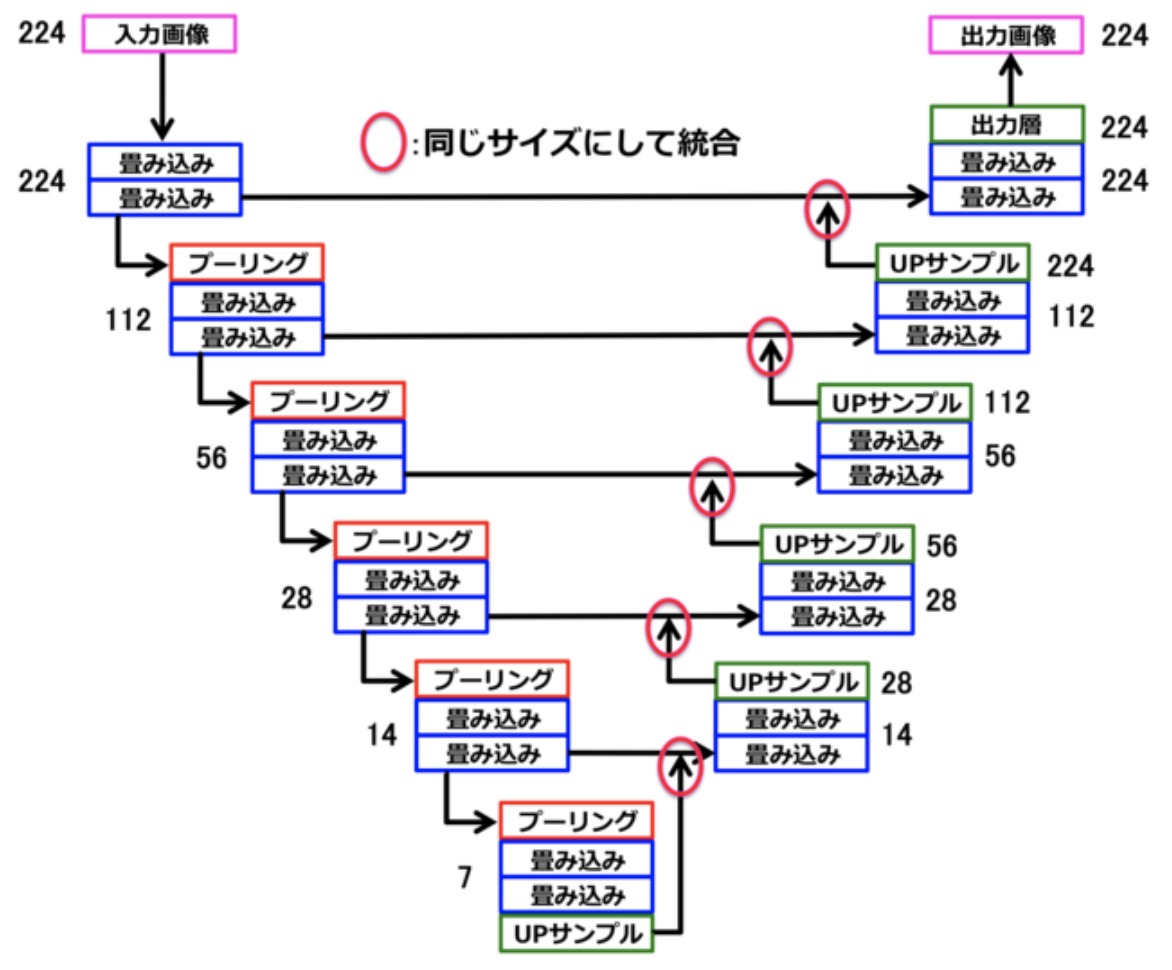

参考ページ：https://www.renom.jp/ja/notebooks/tutorial/image_processing/u-net/notebook.html